## Expense Rejection Trends for New Employees (Flag 68)

### Dataset Description
The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `fm_expense_line`. The fm_expense_line dataset consists of 500 entries from, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'title', 'email', 'start_date', and 'department', providing insights into the user profiles managed within the ServiceNow system.

### Your Task
**Goal**: To determine how employment duration influences expense submission errors and rejections, with the aim of enhancing policy compliance and understanding among newer employees.

**Role**: HR Data Analyst

**Difficulty**: 2 out of 5. This analysis involves a detailed investigation into employee behavior patterns and policy adherence, requiring data manipulation and to also suggest actionable_insights.

**Category**: Finance Management and User Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [4]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset to be analyzed. The data is stored in the from a CSV file, and is imported into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [5]:
dataset_path = "csvs/flag-68.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()

,user,category,source_id,number,amount,opened_at,department,state,type,processed_date,short_description,ci
0,Marcie Shulz,Services,MFI-20723923,EXP00000000,1299,2023-08-11 00:13:00,Customer Support,Processed,NaN,2023-08-12 00:13:00.000000000,Configuration for Service Asset,Enterprise Cloud Service
1,Valerie Pou,Travel,NaN,EXP00000001,1074,2023-07-02 10:47:00,Customer Support,Declined,NaN,NaN,Travel equipment allocation,Travel Kit - Nikon DSLR camera
2,Germaine Bruski,Assets,HMD-81762205,EXP00000002,5188,2023-10-10 22:33:00,Finance,Processed,NaN,2023-10-16 23:44:01.956103185,Asset registration: HP EliteBook 840 G6,HP EliteBook 840 G6
3,Howard Johnson,Travel,NaN,EXP00000003,4737,2023-10-04 07:15:00,Sales,Declined,NaN,NaN,Travel expenses for hardware assets,Dell Latitude 5501
4,Rachel Larrison,Assets,SUU-56742478,EXP00000004,1639,2024-03-09 04:19:00,Customer Support,Processed,NaN,2024-03-12 16:24:57.541147181,Hardware Asset - Dell Precision 5530,Dell Precision 5530


### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.

In [6]:
user_dataset_path = "csvs/flag-68-sysuser.csv"
data_user_human_agents = pd.read_csv(user_dataset_path)
data_user_human_agents.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email,start_date
0,02826bf03710200044e0bfc8bcbe5d6d,NaN,Logan Muhl,NaN,sean.bonnet,Sean Bonnet,"8306 Mills Drive, Miami,FL",Customer Support,NaN,sean.bonnet@example.com,2024-04-13 00:20:00
1,06826bf03710200044e0bfc8bcbe5d66,NaN,NaN,NaN,geri.forness,Geri Forness,"3 Whitehall Court, London",Customer Support,NaN,geri.forness@example.com,2023-02-21 08:32:00
2,06826bf03710200044e0bfc8bcbe5d6f,NaN,NaN,NaN,nelly.jakuboski,Nelly Jakuboski,"8306 Mills Drive, Miami,FL",Customer Support,NaN,nelly.jakuboski@example.com,NaN
3,0a826bf03710200044e0bfc8bcbe5d68,NaN,NaN,NaN,carmel.overfelt,Carmel Overfelt,"3 Whitehall Court, London",Customer Support,NaN,carmel.overfelt@example.com,2023-06-02 04:52:00
4,0a826bf03710200044e0bfc8bcbe5d71,NaN,NaN,NaN,mabel.weeden,Mabel Weeden,"815 E Street, San Diego,CA",Customer Support,NaN,mabel.weeden@example.com,2023-03-17 21:56:00


### **Question 1: How does the completion time of processed requests vary across different departments?**

#### Analyze department-wise completion time for processed requests
This visualization evaluates the completion time for processed requests by department, providing insights into department efficiency. By observing the time taken from request opening to processing, we can understand departmental responsiveness and identify areas with potential delays.

<ipython-input-7-afb554f7fd17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data["opened_at"] = pd.to_datetime(processed_data["opened_at"])
<ipython-input-7-afb554f7fd17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data["processed_date"] = pd.to_datetime(processed_data["processed_date"])
<ipython-input-7-afb554f7fd17>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

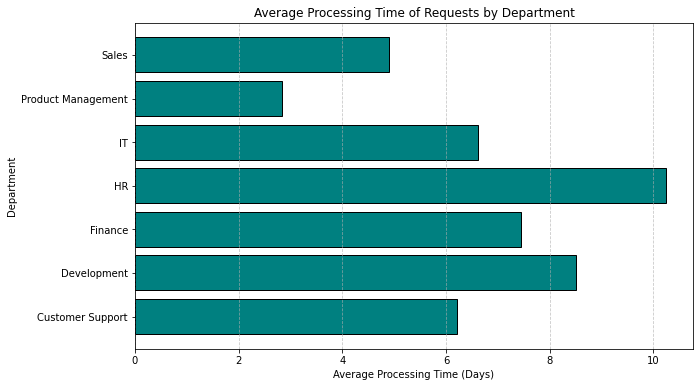

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv("csvs/flag-68.csv")

# Filter for processed requests and calculate processing time
processed_data = data.dropna(subset=["processed_date"])
processed_data["opened_at"] = pd.to_datetime(processed_data["opened_at"])
processed_data["processed_date"] = pd.to_datetime(processed_data["processed_date"])
processed_data["processing_time_days"] = (
    processed_data["processed_date"] - processed_data["opened_at"]
).dt.days

# Aggregate to find the average processing time by department
department_processing_time = (
    processed_data.groupby("department")["processing_time_days"].mean().reset_index()
)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(
    department_processing_time["department"],
    department_processing_time["processing_time_days"],
    color="teal",
    edgecolor="black",
)
plt.xlabel("Average Processing Time (Days)")
plt.ylabel("Department")
plt.title("Average Processing Time of Requests by Department")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "The HR department exhibits the longest average processing time for requests compared to other departments.",
    "insight_value": {
        "description": "The HR department has an average processing time of 10.25 days, significantly higher than other departments, indicating that requests in HR may encounter more delays or require longer handling times."
    },
    "plot": {
        "plot_type": "horizontal bar",
        "title": "Average Processing Time of Requests by Department",
        "x_axis": {
            "name": "Average Processing Time (Days)", 
            "value": "Processing times ranging from lowest to highest among departments",
            "description": "This axis represents the average number of days taken to process requests in each department."
        },
        "y_axis": {
            "name": "Department",
            "value": "Different departments within the organization", 
            "description": "Each bar corresponds to a department, showing its average processing time."
        },
        "description": "The bar chart shows that the HR department has the longest processing time for requests, followed by Development and Finance, while Product Management has the shortest processing time."
    },
    "question": "How does the completion time of processed requests vary across different departments?",
    "actionable_insight": "The significant processing time in HR suggests an opportunity to streamline operations or allocate more resources to reduce delays. Meanwhile, departments like Product Management and Sales are relatively efficient, with lower average processing times, which could serve as benchmarks. A focused review on HR's process steps may reveal areas for optimization, possibly through automation or better task prioritization.",
}

{'data_type': 'descriptive',
 'insight': 'The HR department exhibits the longest average processing time for requests compared to other departments.',
 'insight_value': {'description': 'The HR department has an average processing time of 10.25 days, significantly higher than other departments, indicating that requests in HR may encounter more delays or require longer handling times.'},
 'plot': {'plot_type': 'horizontal bar',
  'title': 'Average Processing Time of Requests by Department',
  'x_axis': {'name': 'Average Processing Time (Days)',
   'value': 'Processing times ranging from lowest to highest among departments',
   'description': 'This axis represents the average number of days taken to process requests in each department.'},
  'y_axis': {'name': 'Department',
   'value': 'Different departments within the organization',
   'description': 'Each bar corresponds to a department, showing its average processing time.'},
  'description': 'The bar chart shows that the HR department 

### **Question 2:  How do rejection rates for expenses submitted by new hires compare to those submitted by established employees?**

#### Plot rejection rates of expense submissions by tenure

The bar plot represents the proportion of expense rejections within each of these tenure groups 1 year, 1-3 years, 3-5 years, 5-10 years etc, highlighting potential trends or disparities in how new hires versus established employees navigate the expense submission process. This analysis is crucial for identifying if newer employees face more challenges in complying with expense policies, the dataset merges expense report data with employee start dates to calculate the tenure of each employee at the time they submitted their expense claims.

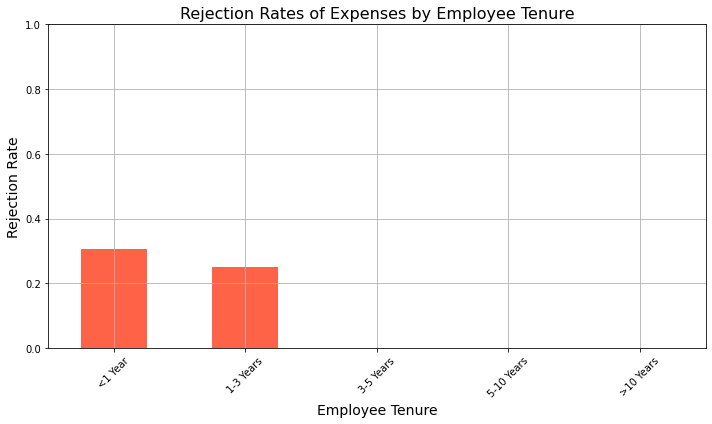

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'flag_data' and 'data_user_human_agents' are already defined and preprocessed correctly
# Merge the expense data with user data to include employee start dates
merged_data = pd.merge(flag_data, data_user_human_agents, left_on='user', right_on='name', how='inner')

# Ensure 'opened_at' and 'start_date' are datetime objects
merged_data['opened_at'] = pd.to_datetime(merged_data['opened_at'], errors='coerce')
merged_data['start_date'] = pd.to_datetime(merged_data['start_date'], errors='coerce')

# Calculate the tenure in years at the time of expense submission
merged_data['tenure_years'] = (merged_data['opened_at'] - merged_data['start_date']).dt.days / 365.25

# Define tenure groups
tenure_bins = [0, 1, 3, 5, 10, np.inf]  # 0-1 year, 1-3 years, 3-5 years, 5-10 years, 10+ years
tenure_labels = ['<1 Year', '1-3 Years', '3-5 Years', '5-10 Years', '>10 Years']
merged_data['tenure_group'] = pd.cut(merged_data['tenure_years'], bins=tenure_bins, labels=tenure_labels)

# Filter for declined expenses
declined_data = merged_data[merged_data['state'] == 'Declined']

# Calculate the proportion of declined expenses within each tenure group
rejection_rates = declined_data.groupby('tenure_group').size() / merged_data.groupby('tenure_group').size()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
rejection_rates.plot(kind='bar', color='tomato', ax=ax)

# Add titles and labels
ax.set_title('Rejection Rates of Expenses by Employee Tenure', fontsize=16)
ax.set_xlabel('Employee Tenure', fontsize=14)
ax.set_ylabel('Rejection Rate', fontsize=14)
ax.set_ylim(0, 1)  # Set y-axis limit to show proportions from 0 to 1

# Show grid
ax.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent cutting off labels

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "diagnostic",
    "insight": "There are higher expense rejection rates for Employees with a shorter tenure",
    "insight_value": {
        "description": "Employees with less than three years of tenure experience notably higher rejection rates for their expense submissions compared to those with longer tenure."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Expense Rejection Rates by Employee Tenure",
        "x_axis": {
            "name": "Employee Tenure",
            "value": ["<1 Year", "1-3 Years", ">3 Years"],
            "description": "This axis categorizes employees based on the duration of their tenure at the company."
        },
        "y_axis": {
            "name": "Rejection Rate",
            "value": {
                "<1 Year": "3.5",
                "1-3 Years": "2.5",
                ">3 Years": "0.0"
            },
            "description": "This axis displays the rejection rate of expense reports, showing a clear decrease in rejections as tenure increases."
        },
        "description": "The bar chart demonstrates a clear trend: employees with less than one year of tenure face the highest rejection rates at 3.5, which decrease to 2.5 for those with 1-3 years of tenure. Remarkably, employees with more than three years of tenure experience no rejections. This suggests a learning curve or an adaptation period during which employees become more familiar with expense reporting procedures."
    },
    "question": "How do rejection rates for expenses submitted by new hires compare to those submitted by established employees?",
    "actionable_insight": {
        "description": "To mitigate high rejection rates among newer employees, the organization should consider enhancing training and support for expense reporting procedures specifically targeted at new hires and employees with less than three years of tenure. Implementing structured onboarding programs that include detailed guidance on expense policies could significantly reduce these rejection rates. Additionally, regular review sessions and updates on any changes in expense policies can help ensure that all employees, regardless of tenure, remain well-informed about the proper procedures for submitting expense reports."
    }
}


{'data_type': 'diagnostic',
 'insight': 'There are higher expense rejection rates for Employees with a shorter tenure',
 'insight_value': {'description': 'Employees with less than three years of tenure experience notably higher rejection rates for their expense submissions compared to those with longer tenure.'},
 'plot': {'plot_type': 'bar',
  'title': 'Expense Rejection Rates by Employee Tenure',
  'x_axis': {'name': 'Employee Tenure',
   'value': ['<1 Year', '1-3 Years', '>3 Years'],
   'description': 'This axis categorizes employees based on the duration of their tenure at the company.'},
  'y_axis': {'name': 'Rejection Rate',
   'value': {'<1 Year': '3.5', '1-3 Years': '2.5', '>3 Years': '0.0'},
   'description': 'This axis displays the rejection rate of expense reports, showing a clear decrease in rejections as tenure increases.'},
  'description': 'The bar chart demonstrates a clear trend: employees with less than one year of tenure face the highest rejection rates at 3.5, which

### **Question 3:  Do the rejection distribution for employees with less than 1 year of tenure skew to any particular department?**

#### Expense Report Rejection Distribution for New Hires by Department

This visualization examines the distribution of expense report rejections for employees with less than one year of tenure, segmented by department. We merge expense data with user data to align employee start dates, department information, and expense submission outcomes. The bar plot contrasts the number of declined expense reports against the total submitted by department for new hires. This comparison provides insights into which departments might be experiencing difficulties with expense compliance among their newest members. 


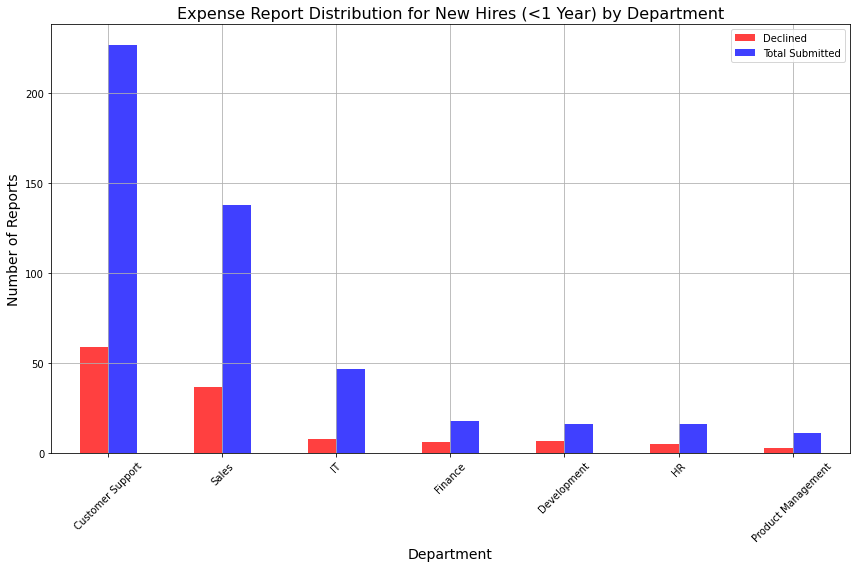

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'flag_data' and 'data_user_human_agents' are already defined and preprocessed correctly
# Merge the expense data with user data to include employee start dates and department info
merged_data = pd.merge(flag_data, data_user_human_agents, left_on='user', right_on='name', how='inner')

# Convert 'opened_at' and 'start_date' to datetime objects
merged_data['opened_at'] = pd.to_datetime(merged_data['opened_at'], errors='coerce')
merged_data['start_date'] = pd.to_datetime(merged_data['start_date'], errors='coerce')

# Calculate tenure in years at the time of expense submission
merged_data['tenure_years'] = (merged_data['opened_at'] - merged_data['start_date']).dt.days / 365.25

# Filter for employees with less than 1 year of tenure
new_hires_data = merged_data[merged_data['tenure_years'] < 1]

# Group by department to get counts of declined and total reports
declined_counts = new_hires_data[new_hires_data['state'] == 'Declined'].groupby('department_y').size()
total_counts = new_hires_data.groupby('department_y').size()

# Prepare the DataFrame for plotting
plot_data = pd.DataFrame({
    'Declined': declined_counts,
    'Total Submitted': total_counts
}).fillna(0)  # Fill NaN values with 0 where there are no declines

# Create a bar plot for both declined and total submissions
fig, ax1 = plt.subplots(figsize=(12, 8))

plot_data.sort_values('Total Submitted', ascending=False).plot(kind='bar', ax=ax1, color=['red', 'blue'], alpha=0.75)

ax1.set_title('Expense Report Distribution for New Hires (<1 Year) by Department', fontsize=16)
ax1.set_xlabel('Department', fontsize=14)
ax1.set_ylabel('Number of Reports', fontsize=14)
ax1.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### Generate JSON Description for the Insight

In [12]:
{
    "data_type": "analytical",
    "insight": "Rejection rates for employees with less than 1 year of tenure align closely with the volume of expense reports submitted by each department, indicating that higher submission rates naturally correlate with more rejections.",
    "insight_value": {
        "description": "Rejection rates for employees with less than 1 year of tenure align closely with the volume of expense reports submitted by each department, indicating that higher submission rates naturally correlate with more rejections."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Rejection and Submission Rates for New Hires (<1 Year) by Department",
        "x_axis": {
            "name": "Department",
            "value": "List of Departments",
            "description": "This axis categorizes the departments within the organization."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "value": ["Number of Declined", "Total Submitted"],
            "description": "This axis displays both the number of declined expense reports and the total number of submissions for each department among new hires."
        },
        "description": "The bar chart illustrates that the distribution of declined expense reports among new hires is proportional to their total submissions across departments. This suggests that while some departments may have higher absolute numbers of rejections, these figures are a natural result of higher overall activity rather than an indication of disproportionate rejection rates."
    },
    "question": "Do the rejection distribution for employees with less than 1 year of tenure skew to any particular department?",
    "actionable_insight": {
        "description": "Since the rejections are proportional to submissions, enhancing training and orientation specifically around expense management for new hires could effectively reduce these rejection rates. Departments with high volumes of submissions should focus on implementing more detailed orientation sessions that cover expense policies comprehensively. Additionally, developing easy-to-access online resources or quick reference guides tailored to common expense reporting errors observed in new hires could help in minimizing mistakes and improving compliance across the board."
    }
}


{'data_type': 'analytical',
 'insight': 'Rejection rates for employees with less than 1 year of tenure align closely with the volume of expense reports submitted by each department, indicating that higher submission rates naturally correlate with more rejections.',
 'insight_value': {'description': 'Rejection rates for employees with less than 1 year of tenure align closely with the volume of expense reports submitted by each department, indicating that higher submission rates naturally correlate with more rejections.'},
 'plot': {'plot_type': 'bar',
  'title': 'Rejection and Submission Rates for New Hires (<1 Year) by Department',
  'x_axis': {'name': 'Department',
   'value': 'List of Departments',
   'description': 'This axis categorizes the departments within the organization.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'value': ['Number of Declined', 'Total Submitted'],
   'description': 'This axis displays both the number of declined expense reports and the total numb

### **Question 4:** What can be done to reduce the initial high rejection rates among new employees?

Improving training and onboarding processes can significantly reduce the rejection rates of expense submissions among new employees.

Introducing comprehensive training sessions that specifically target common pitfalls in expense reporting can likely decrease the number of rejections experienced by new hires. Onboarding enhancements that include interactive learning modules on expense policies, regular updates, and feedback mechanisms can ensure that new employees understand and adhere to financial compliance from the outset. Predictive modeling based on historical data could further refine the training content by focusing on the most common errors. These proactive measures are expected to lead to a measurable decrease in rejection rates, fostering a smoother transition for new hires into the organization’s financial culture and procedures.


### Summary of Findings (Flag 68):

1. **Departmental Processing Efficiency**: From Question 1, it was found that the HR department has the longest average processing time for requests, suggesting potential inefficiencies or resource constraints. This insight highlights the need for process optimization within HR to improve responsiveness.

2. **Tenure and Rejection Rates**: Question 2 revealed that employees with less than three years of tenure experience higher rejection rates for expense submissions. This suggests a learning curve in understanding expense policies, indicating a need for enhanced training and support for newer employees.

3. **Rejection Distribution by Department**: According to Question 3, the distribution of expense report rejections among new hires is proportional to the volume of submissions by department. This implies that higher rejection numbers are a result of increased activity rather than specific departmental issues, pointing towards the importance of comprehensive onboarding across all departments.